In [41]:
import numpy as np
import matplotlib.pyplot as plt

Selected Points Kernel Matrix:
[[1.00e+00 1.99e-07 7.26e-06]
 [1.99e-07 1.00e+00 1.27e-08]
 [7.26e-06 1.27e-08 1.00e+00]]


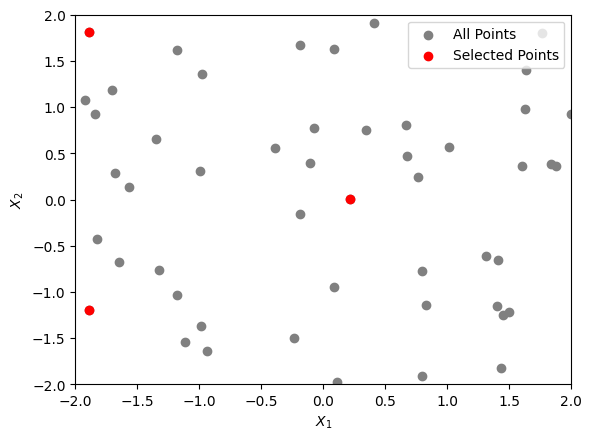

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate random points
points = np.random.uniform(-2, 2, (50, 2))

# Gaussian kernel function
def gaussian_kernel(x, y, sigma=1.0):
    squared_dist = np.sum((x - y) ** 2)
    return np.exp(-squared_dist / (2 * sigma ** 2))

# Compute distances using the Gaussian kernel
dist_matrix = cdist(points, points, metric=lambda u, v: gaussian_kernel(u, v, sigma=0.5))
inverted_dist_matrix = 1 - dist_matrix

# Select points
selected_points_indices = [np.random.randint(0, len(points))]
for _ in range(2):
    min_dist_to_selected = np.min(inverted_dist_matrix[:, selected_points_indices], axis=1)
    next_point_index = np.argmax(min_dist_to_selected)
    selected_points_indices.append(next_point_index)

selected_points = points[selected_points_indices]

# Extract and print the submatrix of the Gaussian kernel distances for the selected points
selected_points_kernel_matrix = dist_matrix[np.ix_(selected_points_indices, selected_points_indices)]
print("Selected Points Kernel Matrix:")
print(np.array2string(selected_points_kernel_matrix, formatter={'float_kind':lambda x: "%.2e" % x}))

plt.scatter(points[:, 0], points[:, 1], label='All Points', color = 'grey')
plt.scatter(selected_points[:, 0], selected_points[:, 1], color='r', label='Selected Points')
plt.legend(loc='upper right')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

K (correlation) kernel computed via:
- U diag(eig_K) U.T
K (correlation) kernel computed via:
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T


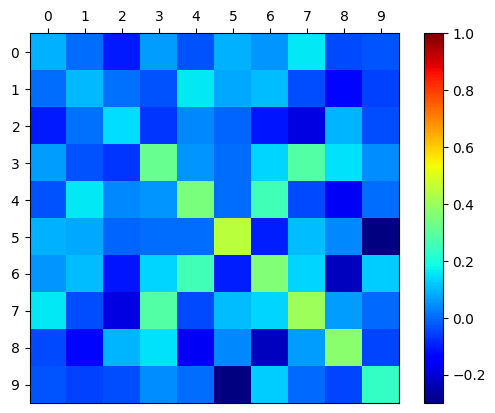

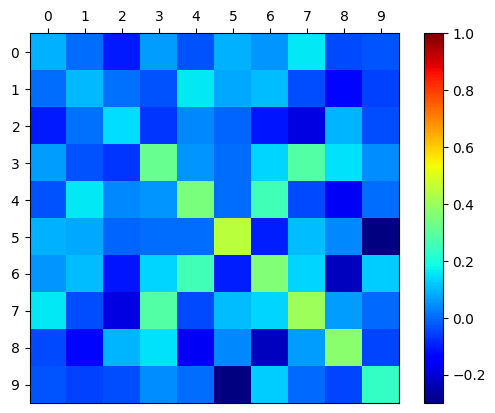

In [54]:
# from numpy import sqrt
from numpy.random import rand, randn
from scipy.linalg import qr
from dppy.finite_dpps import FiniteDPP

r, N = 4, 10
e_vecs, _ = qr(randn(N, r), mode='economic')

# Inclusion K
e_vals_K = rand(r)  # in [0, 1]
dpp_K = FiniteDPP('correlation', **{'K_eig_dec': (e_vals_K, e_vecs)})
# or
# K = (e_vecs * e_vals_K).dot(e_vecs.T)
# dpp_K = FiniteDPP('correlation', **{'K': K})
dpp_K.plot_kernel()

# Marginal L
e_vals_L = e_vals_K / (1.0 - e_vals_K)
dpp_L = FiniteDPP('likelihood', **{'L_eig_dec': (e_vals_L, e_vecs)})
# or
# L = (e_vecs * e_vals_L).dot(e_vecs.T)
# dpp_L = FiniteDPP('likelihood', **{'L': K})
# Phi = (e_vecs * sqrt(e_vals_L)).T
# dpp_L = FiniteDPP('likelihood', **{'L_gram_factor': Phi})  # L = Phi.T Phi
dpp_L.plot_kernel()


GS


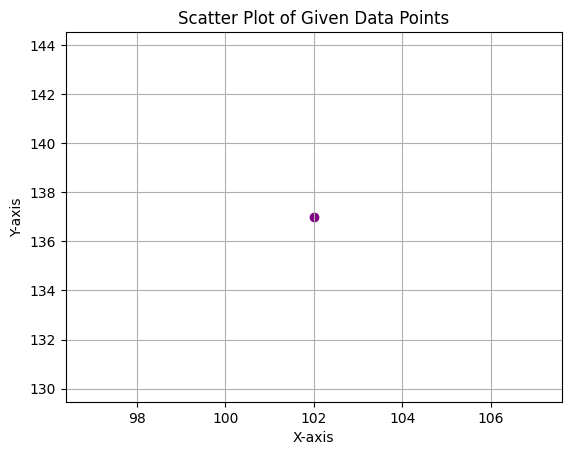

In [80]:
import numpy as np
from scipy.linalg import qr
from dppy.finite_dpps import FiniteDPP

seed = 0
rng = np.random.RandomState(seed)

r, N = 2, 200
eig_vals = np.ones(r)  # For projection DPP
eig_vecs, _ = qr(rng.randn(N, r), mode='economic')

DPP = FiniteDPP(kernel_type='correlation',
                projection=True,
                **{'K': (eig_vecs * eig_vals).dot(eig_vecs.T)})

rng = np.random.RandomState(seed)
DPP.flush_samples()

for _ in range(N):
    DPP.sample_exact(mode='GS', random_state=rng)

print(DPP.sampling_mode)
sampl= (DPP.list_of_samples)
sampl = np.array(sampl)
plt.scatter(sampl[:, 0], sampl[:, 1], color='purple', marker='o')
plt.title('Scatter Plot of Given Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

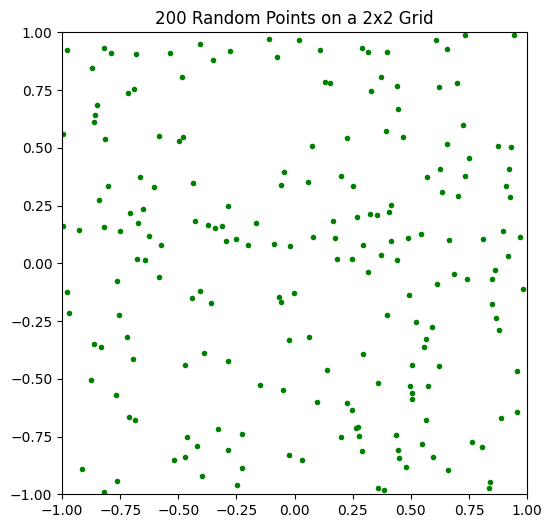

In [66]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_points_on_grid(point_count):
    """
    Plots randomly generated points within a 2x2 grid ranging from -1 to 1 on both axes.

    Parameters:
    - point_count: The number of random points to generate and plot.
    """
    # Generate random points within the specified range
    points = np.random.uniform(low=-1, high=1, size=(point_count, 2))
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], color='green', marker='.')
    plt.title(f'{point_count} Random Points on a 2x2 Grid')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

# Example: Plotting 100 random points on a 2x2 grid
plot_random_points_on_grid(200)